## Group Assignment-1



*   Aashi Aashi 
*   Alisa Sood 
*   Harshit Jain
*   Akshaya  
*   Tyler





 




In [ ]:
!pip install selenium
!apt-get -q update   #Used to handle installation and removal of softwares and libraries
!apt install -yq chromium-chromedriver #ChromeDriver is a separate executable that Selenium WebDriver uses to control Chrome.
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 985 kB 36.9 MB/s 
     |████████████████████████████████| 358 kB 62.1 MB/s 
     |████████████████████████████████| 140 kB 57.4 MB/s 
     |████████████████████████████████| 58 kB 6.6 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.12 which is incompatible.
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:4 https:/

In [2]:
import sys
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import os
import copy
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import time
import re
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from nltk import FreqDist
import seaborn as sns; sns.set_theme()
import numpy as np
from nltk.corpus import stopwords
from sklearn.manifold import Isomap
from sklearn.manifold import MDS
from sklearn import manifold
%matplotlib inline
import math

[nltk_data] Downloading package stopwords to /Users/aashi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/aashi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
#WebDriver is a browser automation framework that works with open source APIs. 
#The framework operates by accepting commands, sending those commands to a browser, and interacting with applications.
chrome_options = webdriver.ChromeOptions()
#headless means running chrome with chrome.exe
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

### **Scrapping 5000 records from Edmunds Website**

In [ ]:
page_url = "https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans" 
driver = webdriver.Chrome('chromedriver',options=chrome_options)
#driver = webdriver.Chrome(ChromeDriverManager().install()) ### Incase of Jupyter Notebook
driver.get(page_url)
driver.maximize_window()
driver.implicitly_wait(10)
comments_df1 = pd.DataFrame(columns = ['Date','Author','Comment']) 
while len(comments_df1)<=5000:
    comments=driver.find_elements(By.CLASS_NAME, value="Comment")
    for comment in comments:
        author=comment.find_element(By.CLASS_NAME, value="Author").text
        date=comment.find_element(By.CLASS_NAME,value= "Meta.CommentMeta.CommentInfo").text 
        comment_body=comment.find_element(By.CLASS_NAME, value="Message.userContent").text
        comments_df1.loc[len(comments_df1.index)] = [ date, author,comment_body]

    next=driver.find_element(By.CLASS_NAME , value="Next")
    next.click()
    time.sleep(5)

driver.close()

# Writing the scrapped data to a csv file
comments_df1.to_csv('Comments.csv', index=False) 

In [3]:
comments_df=pd.read_csv("Comments.csv")
comments_df.head(5)

,Date,Author,Comment
0,April 2002,merc1,I personally think that with a few tweaks the ...
1,April 2002,fredvh,I am debating a new purchase and these two are...
2,April 2002,blueguydotcom,"Great handling, RWD, excellent engine and the ..."
3,April 2002,hungrywhale,And no manual tranny. That may not matter to y...
4,April 2002,riez,One beauty of BMW 3 Series is that there are s...


**Making a copy of dataframe just in case**

In [4]:
comments_copy = copy.deepcopy(comments_df)

**Replacing the newline character with space, to make the entire comment as a paragraph**

In [5]:
def replacenewline(x):
    return(str(x).replace('\n', ' '))
    
comments_df['Comment']=comments_df['Comment'].apply(replacenewline)

Before running the below chunk, make sure car models and brands.csv exists in the file. If not we need to upload on collab

In [6]:
models=pd.read_csv('car models and brands.csv')

models.drop_duplicates(inplace=True)
models.dropna(inplace=True)

**Making everythng lowercase for easy interpretation**

In [7]:
models['Brand'] = models['Brand'].apply(str.lower)
models['Model'] = models['Model'].apply(str.lower)

comments_df['Comment'] = comments_df['Comment'].apply(str.lower)
comments_df['Author'] = comments_df['Author'].apply(str.lower)
comments_df

,Date,Author,Comment
0,April 2002,merc1,i personally think that with a few tweaks the ...
1,April 2002,fredvh,i am debating a new purchase and these two are...
2,April 2002,blueguydotcom,"great handling, rwd, excellent engine and the ..."
3,April 2002,hungrywhale,and no manual tranny. that may not matter to y...
4,April 2002,riez,one beauty of bmw 3 series is that there are s...
...,...,...,...
5045,February 2006,lmacmil,not owning any of these cars (i did own a bmw ...
5046,February 2006,bdr127,how about the fact that a premium pack 330i is...
5047,February 2006,bdr127,"i posted this over in the ""bmw 3-series 2006+""..."
5048,February 2006,carhastobefun,i agree. it's really about the price. more for...


## **Task A**

Once you fetch the data, test if the data support Zipf’s law econometrically. Also plot the most 
common 100 words in the data against the theoretical prediction of the law. For this question, do not 
remove stopwords. Also do not perform stemming or lemmatization. 

In [8]:
comments_zipf=copy.deepcopy(comments_df)

In [9]:
def tokenize_word(text):
    text_tokens = word_tokenize(text)
    return text_tokens

comments_zipf['Comment_tokenised']=comments_zipf['Comment'].apply(tokenize_word)

In [10]:
comments_zipf.head(5)

,Date,Author,Comment,Comment_tokenised
0,April 2002,merc1,i personally think that with a few tweaks the ...,"[i, personally, think, that, with, a, few, twe..."
1,April 2002,fredvh,i am debating a new purchase and these two are...,"[i, am, debating, a, new, purchase, and, these..."
2,April 2002,blueguydotcom,"great handling, rwd, excellent engine and the ...","[great, handling, ,, rwd, ,, excellent, engine..."
3,April 2002,hungrywhale,and no manual tranny. that may not matter to y...,"[and, no, manual, tranny, ., that, may, not, m..."
4,April 2002,riez,one beauty of bmw 3 series is that there are s...,"[one, beauty, of, bmw, 3, series, is, that, th..."


In [11]:
def list_words(x,y):
    word_list=[]
    for row in x[y]:
        word_list+=list(set(row))
    return word_list

Word_list=list_words(comments_zipf,'Comment_tokenised')

In [12]:
Word_list_freq=nltk.FreqDist(Word_list)
top_100=Word_list_freq.most_common(100)
key=list()
value=list()
log_value=list()
for entry in top_100:
    key.append(str(entry[0]))
    value.append(int(entry[1]))
    log_value.append(math.log(int(entry[1])))

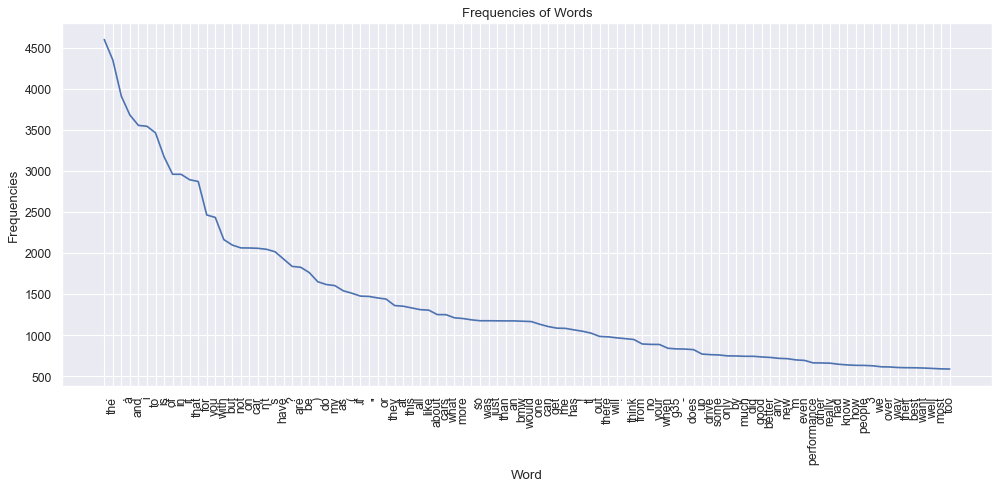

In [13]:
figure(figsize=(15, 6), dpi=80)
plt.plot(key, value)  
plt.title('Frequencies of Words')
plt.xlabel('Word')
plt.ylabel('Frequencies')
plt.xticks(rotation = 90)
plt.show()

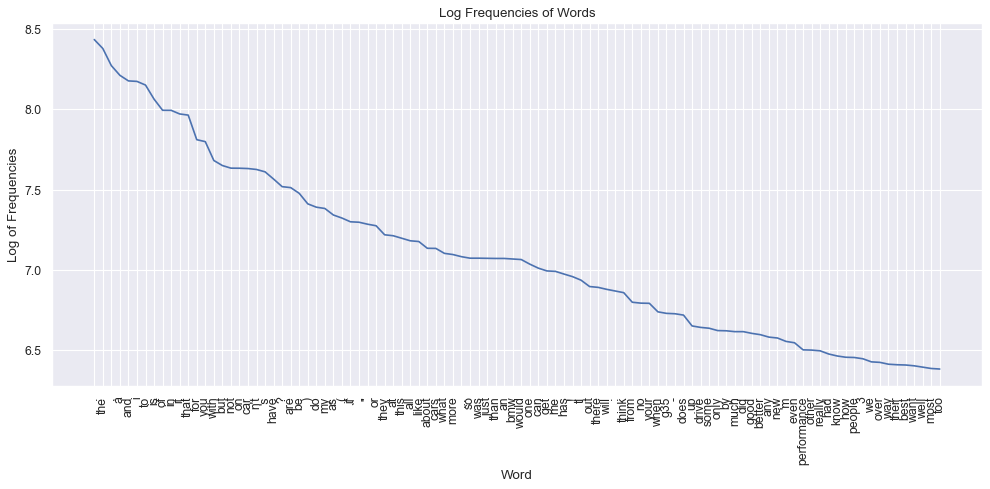

In [14]:
figure(figsize=(15, 6), dpi=80)
plt.plot(key, log_value)  
plt.title('Log Frequencies of Words')
plt.xlabel('Word')
plt.ylabel('Log of Frequencies')
plt.xticks(rotation = 90)
plt.show()

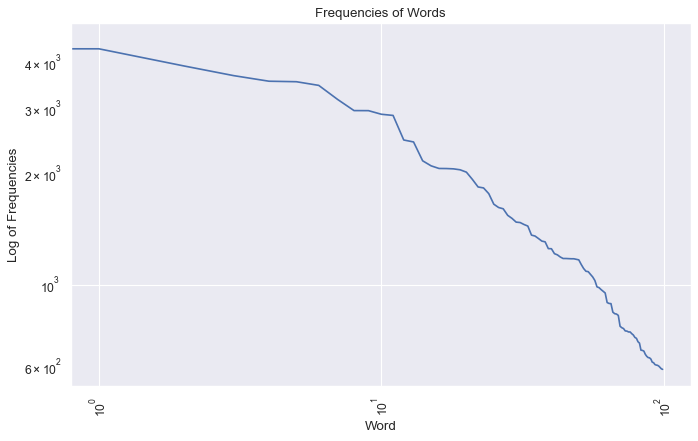

In [16]:
figure(figsize=(10, 6), dpi=80)
plt.plot(key, value)   
plt.title('Frequencies of Words')
plt.xlabel('Word')
plt.ylabel('Log of Frequencies')
plt.xticks(rotation = 90)
plt.xscale("log")
plt.yscale("log")
plt.show()

## **Task B** 
Find the top 10 brands from frequency counts. You will need to write a script to count the 
frequencies of words (stopwords should NOT be counted). Replace frequently occurring car models with 
brands so that from now on you have to deal with only brands and not models.

**Removing the punctuations from the data**

In [17]:
def removing_stopwords(text):
    text_tokens = word_tokenize(text)
    tokens_without_sw =' '.join([word for word in text_tokens if not word in stopwords.words('english')])
    return tokens_without_sw

comments_df['Comment_without_stopwords']=comments_df['Comment'].apply(removing_stopwords)

In [18]:
comments_df

,Date,Author,Comment,Comment_without_stopwords
0,April 2002,merc1,i personally think that with a few tweaks the ...,personally think tweaks c320 could also sit to...
1,April 2002,fredvh,i am debating a new purchase and these two are...,debating new purchase two top list . price dif...
2,April 2002,blueguydotcom,"great handling, rwd, excellent engine and the ...","great handling , rwd , excellent engine best w..."
3,April 2002,hungrywhale,and no manual tranny. that may not matter to y...,"manual tranny . may matter , certainly matter ..."
4,April 2002,riez,one beauty of bmw 3 series is that there are s...,one beauty bmw 3 series many models choose . a...
...,...,...,...,...
5045,February 2006,lmacmil,not owning any of these cars (i did own a bmw ...,"owning cars ( bmw 1600 10 years 1970 1980 ) , ..."
5046,February 2006,bdr127,how about the fact that a premium pack 330i is...,fact premium pack 330i $ 4500 premium pack g35...
5047,February 2006,bdr127,"i posted this over in the ""bmw 3-series 2006+""...","posted `` bmw 3-series 2006+ '' forum , though..."
5048,February 2006,carhastobefun,i agree. it's really about the price. more for...,"agree . 's really price . bmw , less subaru . ..."


**Replacing the model name with brand**

In [19]:
def brand_model_swap(entry):
    for i in models.index.values:
        entry = entry.replace(models["Model"][i].lower(),models["Brand"][i].lower())
    return word_tokenize(entry)
comments_df['Comment_tokenised']=comments_df['Comment_without_stopwords'].apply(brand_model_swap)

In [20]:
comments_df

,Date,Author,Comment,Comment_without_stopwords,Comment_tokenised
0,April 2002,merc1,i personally think that with a few tweaks the ...,personally think tweaks c320 could also sit to...,"[personally, think, tweaks, c320, could, also,..."
1,April 2002,fredvh,i am debating a new purchase and these two are...,debating new purchase two top list . price dif...,"[debating, new, purchase, two, top, ltoyota, ...."
2,April 2002,blueguydotcom,"great handling, rwd, excellent engine and the ...","great handling , rwd , excellent engine best w...","[great, handling, ,, rwd, ,, excellent, engine..."
3,April 2002,hungrywhale,and no manual tranny. that may not matter to y...,"manual tranny . may matter , certainly matter ...","[manual, tranny, ., may, matter, ,, certainly,..."
4,April 2002,riez,one beauty of bmw 3 series is that there are s...,one beauty bmw 3 series many models choose . a...,"[one, beauty, bmw, 3, series, many, models, ch..."
...,...,...,...,...,...
5045,February 2006,lmacmil,not owning any of these cars (i did own a bmw ...,"owning cars ( bmw 1600 10 years 1970 1980 ) , ...","[owning, car, (, bmw, 1600, 10, years, 1970, 1..."
5046,February 2006,bdr127,how about the fact that a premium pack 330i is...,fact premium pack 330i $ 4500 premium pack g35...,"[fact, premium, pack, 330i, $, 4500, premium, ..."
5047,February 2006,bdr127,"i posted this over in the ""bmw 3-series 2006+""...","posted `` bmw 3-series 2006+ '' forum , though...","[posted, ``, bmw, bmw, 2006+, ``, forum, ,, th..."
5048,February 2006,carhastobefun,i agree. it's really about the price. more for...,"agree . 's really price . bmw , less subaru . ...","[agree, ., 's, really, price, ., bmw, ,, less,..."


**Removing the stopwords like " I, to, from etc" from the data**

In [21]:
comments_df.head(5)

,Date,Author,Comment,Comment_without_stopwords,Comment_tokenised
0,April 2002,merc1,i personally think that with a few tweaks the ...,personally think tweaks c320 could also sit to...,"[personally, think, tweaks, c320, could, also,..."
1,April 2002,fredvh,i am debating a new purchase and these two are...,debating new purchase two top list . price dif...,"[debating, new, purchase, two, top, ltoyota, ...."
2,April 2002,blueguydotcom,"great handling, rwd, excellent engine and the ...","great handling , rwd , excellent engine best w...","[great, handling, ,, rwd, ,, excellent, engine..."
3,April 2002,hungrywhale,and no manual tranny. that may not matter to y...,"manual tranny . may matter , certainly matter ...","[manual, tranny, ., may, matter, ,, certainly,..."
4,April 2002,riez,one beauty of bmw 3 series is that there are s...,one beauty bmw 3 series many models choose . a...,"[one, beauty, bmw, 3, series, many, models, ch..."


**Function To get a concatenated list of unique words in each comment**

In [22]:
Final_word_list=list_words(comments_df,'Comment_tokenised')

In [23]:
Final_word_list

['upcoming',
 'stunning',
 'rush',
 '0-60',
 'surfaces',
 'look',
 'sub-40k',
 'people',
 'also',
 '8',
 'ride',
 'compete',
 'let',
 'lust',
 'chassis',
 'dissappointed',
 "'re",
 'one',
 'fwd',
 'lots',
 'group',
 'progress',
 'styled',
 'bottom',
 'mercedes-benz',
 'seems',
 '10',
 'time',
 'hear',
 'come',
 'everyone',
 'match',
 'question',
 'initially',
 'anywhere',
 'bs',
 'accpetable',
 'another',
 'best',
 'simply',
 'rwd',
 'grow',
 'gawd-awful',
 'sold',
 'old',
 'next',
 'going',
 'interior',
 'enough',
 'problem',
 'facelift',
 '``',
 'convert',
 '!',
 'awd',
 'starting',
 "'d",
 'selling',
 "'s",
 'luxury',
 'tires',
 'else',
 'colors',
 'job',
 'cost-cutting',
 'grey',
 'top',
 '?',
 'years',
 'jaguar',
 'vhondants',
 'around',
 'black',
 'class',
 'c320',
 'ever',
 'really',
 '2002',
 'styling',
 'ago',
 'forcing',
 'standout',
 'truly',
 'stingy',
 'main',
 'whatever',
 'little',
 'coupe',
 'package',
 'handling',
 "'ve",
 'looks',
 '330i',
 'metal',
 'ford',
 'thats',

In [24]:
word_freq = nltk.FreqDist(Final_word_list)

In [25]:
word_freq

FreqDist({'.': 4606, ',': 3913, 'car': 2602, "n't": 2049, "'s": 2019, '?': 1841, ')': 1654, '``': 1517, '(': 1514, 'bmw': 1430, ...})

In [26]:
brand_names = models['Brand'].unique()
#Filtering counts for brands
brand_counts = []
for key,item in word_freq.most_common(1000):
    if key in brand_names and key!="car" and key!="sedan" and key!="problem" and key!="seat":
        temp = (key,item)
        brand_counts.append(temp)
print("The top 10 brands from frequency counts \n")
brand_counts[:10]

The top 10 brands from frequency counts 



[('bmw', 1430),
 ('acura', 668),
 ('audi', 476),
 ('nissan', 457),
 ('honda', 443),
 ('infiniti', 405),
 ('subaru', 363),
 ('toyota', 325),
 ('mercedes-benz', 230),
 ('volkswagen', 226)]

## Task C
### Calculate lift ratios for associations between the top-10 brands identified 

In [27]:
top10_brands=[key for key, item in brand_counts[:10]]

In [28]:
brand_count = pd.DataFrame(columns = top10_brands)

def brand_counter(item):
    if brand in item:
        return 1
    else:
        return 0
      
for brand in top10_brands:
    brand_count[brand] = comments_df['Comment_tokenised'].apply(brand_counter)  

In [29]:
brand_lift = pd.DataFrame(columns = top10_brands)
length=len(brand_count)
for i in range(len(top10_brands)):
    for j in range(len(top10_brands)):
        if j<=i :
            brand_lift.loc[top10_brands[i],top10_brands[j]]=''
        else:
            Confidence=(brand_count[((brand_count[top10_brands[i]]==1) & (brand_count[top10_brands[j]]==1 ))][top10_brands[i]].count())
            Support_i=(brand_count[((brand_count[top10_brands[i]]==1))][top10_brands[i]].count())
            Support_j=(brand_count[((brand_count[top10_brands[j]]==1))][top10_brands[j]].count())
            Lift=(Confidence*length/(Support_i*Support_j))
            brand_lift.loc[top10_brands[i],top10_brands[j]]=Lift
brand_lift

,bmw,acura,audi,nissan,honda,infiniti,subaru,toyota,mercedes-benz,volkswagen
bmw,,1.374524,1.609934,1.012303,1.243587,1.927048,0.972856,1.369123,1.85786,1.375085
acura,,,2.557018,2.233225,2.116084,2.706624,2.228394,1.511976,1.906405,2.843318
audi,,,,2.182208,1.22138,2.540979,1.256742,1.077246,3.459536,5.53934
nissan,,,,,2.768818,1.828079,4.079185,2.516075,1.297212,3.862725
honda,,,,,,1.322911,1.130534,4.173989,1.486898,1.714976
infiniti,,,,,,,1.133558,1.074264,2.493827,1.986234
subaru,,,,,,,,0.898919,1.088753,1.292694
toyota,,,,,,,,,2.026756,1.718856
mercedes-benz,,,,,,,,,,3.011735
volkswagen,,,,,,,,,,


<AxesSubplot:title={'center':'Lift score heat map'}>

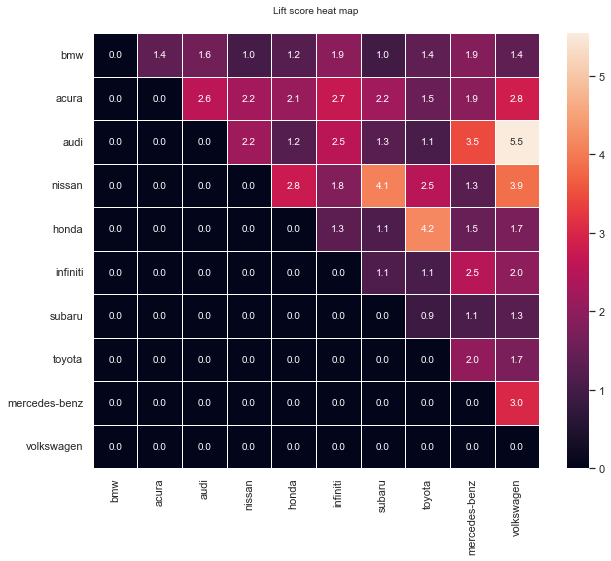

In [28]:
brand_lift.replace('', int(0), inplace=True)

plt.figure(figsize=(10,8))
plt.title('Lift score heat map', fontsize = 10, pad = 20)
sns.heatmap(brand_lift, linewidths=0.5, annot=True, fmt=".1f", annot_kws={"fontsize":10})

## Task D
### Show the brands on a multi-dimensional scaling (MDS) map

In [29]:
brand_lift_mds=pd.DataFrame(columns = top10_brands)
for i in range(len(top10_brands)):
    for j in range(len(top10_brands)):
        if j<=i :
            brand_lift_mds.loc[top10_brands[i],top10_brands[j]]=brand_lift.loc[top10_brands[j],top10_brands[i]]
        else:
            brand_lift_mds.loc[top10_brands[i],top10_brands[j]]= brand_lift.loc[top10_brands[i],top10_brands[j]]
            
brand_lift_mds.replace('', int(0), inplace=True)

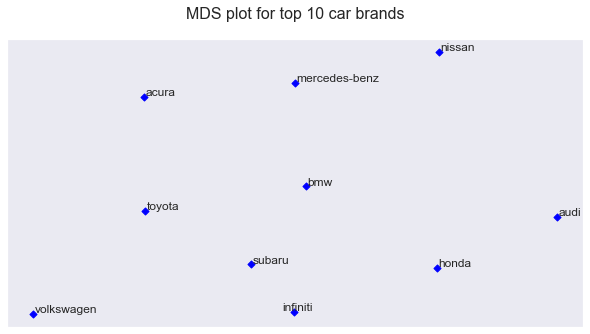

In [30]:
# MDS Map

mdsmatrix=brand_lift_mds.values

mds=manifold.MDS(n_components=2, dissimilarity ='precomputed', random_state=10)

results=mds.fit(mdsmatrix)
coords=results.embedding_

x=coords[:,0]
y=coords[:,1]

plt.figure(figsize=(8,4)) 

ax=plt.axes([0.,0.,1.,1.])
plt.title('MDS plot for top 10 car brands', fontsize = 16, pad = 20)
plt.scatter(x, y, marker='D', color='blue', s = 25)

n=list(brand_lift.index)

for i in range(len(n)):
    if n[i] == 'infiniti':
        ax.annotate(n[i], xy= (x[i] - 0.08, y[i] + 0.01), fontsize = 12)
    else:
        ax.annotate(n[i], xy = (x[i] + 0.01, y[i] + 0.01), fontsize = 12)
       
plt.xticks([])
plt.yticks([])

plt.show()

## Task E:
### What insights can you offer to your client from your analyses in Tasks C and D 

## Task F
### Part A - What are 5 most frequently mentioned attributes or features of cars in the discussions? 


In [46]:
Features=pd.read_csv("Feature_list.csv")
Features['Child'] = Features['Child'].str.lower()
Features['Parent'] = Features['Parent'].str.lower()

In [47]:
Features_comment_df=pd.DataFrame(comments_df['Comment_tokenised'])

In [48]:
def feature_swap(entry):
    entry=' '.join(str(x) for x in entry)
    for i in Features.index.values:
        #print(Features["Child"][i].lower(),Features["Parent"][i].lower())
        entry = (entry.replace(str(Features["Child"][i]),str(Features["Parent"][i])))
    return word_tokenize(entry)
Features_comment_df['Comment_feature_tokenised']=Features_comment_df['Comment_tokenised'].apply(feature_swap)

In [54]:
features_word=list_words(Features_comment_df,'Comment_feature_tokenised')
word_Freq=nltk.FreqDist(features_word)
word_Freq

FreqDist({'.': 4606, ',': 3913, 'performance': 2650, 'car': 2602, "n't": 2049, "'s": 2019, '?': 1841, ')': 1654, '``': 1517, '(': 1514, ...})

In [55]:
Feature = Features['Parent'].unique()
#Filtering counts for brands
Feature_counts = []
for key,item in word_Freq.most_common(10000):
    if key in Feature :
        temp = (key,item)
        Feature_counts.append(temp)
Feature_counts[:10]

[('performance', 2650),
 ('aesthetics', 1396),
 ('price', 1328),
 ('comfort', 858),
 ('console', 478),
 ('luxury', 472),
 ('efficiency', 434),
 ('styling', 391),
 ('maintenance', 237),
 ('safety', 215)]

### Part B -  Which attributes are most strongly associated with which of these 5 brands? 

In [50]:
top5_brands=[key for key, item in brand_counts[:5]]
top10_features=[key for key, item in Feature_counts[:10]]
column=top5_brands+top10_features
brand_feature = pd.DataFrame(columns = column)

def feature_counter(item):
    if feature in item:
        return 1
    else:
        return 0
      
for  brand in top5_brands:
    brand_feature[brand] = Features_comment_df['Comment_feature_tokenised'].apply(brand_counter)  

for feature in top10_features:
    brand_feature[feature] = Features_comment_df['Comment_feature_tokenised'].apply(feature_counter)  

In [51]:
brand_feature_lift = pd.DataFrame(columns = top10_features, dtype=float)
length=len(brand_feature)
for i in range(len(top5_brands)):
    for j in range(len(top10_features)):
        
        Confidence=(brand_feature[((brand_feature[top5_brands[i]]==1) & (brand_feature[top10_features[j]]==1 ))][top5_brands[i]].count())
        Support_i=(brand_feature[((brand_feature[top5_brands[i]]==1))][top5_brands[i]].count())
        Support_j=(brand_feature[((brand_feature[top10_features[j]]==1))][top10_features[j]].count())
        Lift=(Confidence*length/(Support_i*Support_j))
        brand_feature_lift.loc[top5_brands[i],top10_features[j]]=float(Lift)





In [52]:
brand_feature_lift

,performance,aesthetics,price,comfort,console,luxury,efficiency,styling,maintenance,safety
bmw,1.182469,1.209994,1.421055,1.322970,1.244181,1.317850,1.182218,1.330208,1.616266,1.225907
acura,1.324062,1.334645,1.318728,1.442852,1.797281,1.887145,0.974010,1.525161,1.051068,1.439497
honda,1.256130,1.374374,1.581325,1.410256,1.594203,1.631356,1.612903,1.253197,1.476793,2.046512
audi,1.350489,1.405373,1.375617,1.774300,1.217271,1.557049,1.306322,1.530539,1.904875,1.416139
nissan,1.176094,1.273070,1.140813,1.330698,1.431947,1.209469,1.113003,1.460024,1.297010,1.633974


<AxesSubplot:title={'center':'Lift score heat map'}>

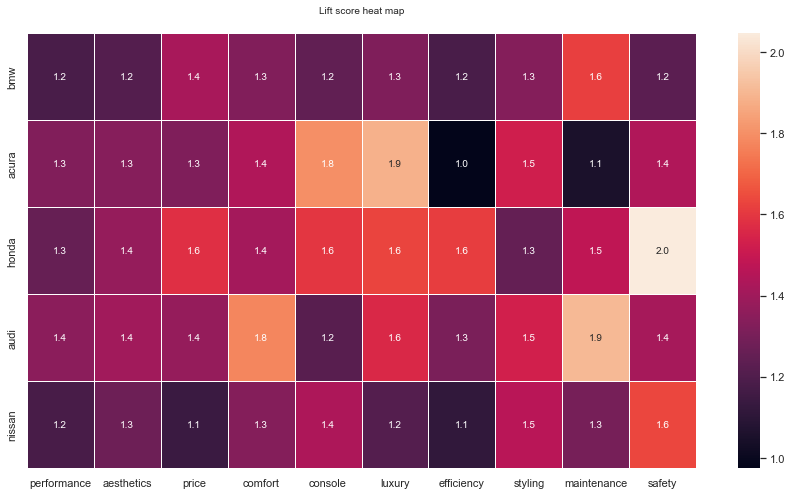

In [53]:
plt.figure(figsize=(15,8))
plt.title('Lift score heat map', fontsize = 10, pad = 20)
sns.heatmap(brand_feature_lift, linewidths=0.5, annot=True, fmt=".1f", annot_kws={"fontsize":10})

## Another Approach

In [64]:
Features_new=pd.read_csv("Features1.csv")
Features_new['Feature'] = Features_new['Feature'].str.lower()
Features_comment_new_df=pd.DataFrame(comments_df['Comment_tokenised'])
features_word=list_words(Features_comment_new_df,'Comment_tokenised')
word_Freq=nltk.FreqDist(features_word)
word_Freq

FreqDist({'.': 4606, ',': 3913, 'car': 2602, "n't": 2049, "'s": 2019, '?': 1841, ')': 1654, '``': 1517, '(': 1514, 'bmw': 1430, ...})

In [65]:
Feature = Features_new['Feature'].unique()
#Filtering counts for brands
Feature_counts_new = []
for key,item in word_Freq.most_common(10000):
    if key in Feature :
        temp = (key,item)
        Feature_counts_new.append(temp)
Feature_counts_new[:10]

[('performance', 666),
 ('price', 529),
 ('luxury', 449),
 ('power', 386),
 ('tires', 246),
 ('reliability', 204),
 ('front', 199),
 ('transmission', 155),
 ('rear', 146),
 ('styling', 137)]

In [69]:
brand_feature_new

,bmw,acura,audi,nissan,honda,performance,price,luxury,power,tires,reliability,front,transmission,rear,styling
0,1,1,1,0,0,1,1,1,1,1,0,1,1,0,1
1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5045,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5046,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5047,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5048,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [70]:
top5_brands=[key for key, item in brand_counts[:5]]
top10_features=[key for key, item in Feature_counts_new[:10]]
column=top5_brands+top10_features
brand_feature_new = pd.DataFrame(columns = column)

def feature_counter(item):
    if feature in item:
        return 1
    else:
        return 0
      
for  brand in top5_brands:
    brand_feature_new[brand] = Features_comment_new_df['Comment_tokenised'].apply(brand_counter)  

for feature in top10_features:
    brand_feature_new[feature] = Features_comment_new_df['Comment_tokenised'].apply(feature_counter)  

In [71]:
brand_feature_lift_new = pd.DataFrame(columns = top10_features, dtype=float)
length=len(brand_feature_new)
for i in range(len(top5_brands)):
    for j in range(len(top10_features)):
        
        Confidence=(brand_feature_new[((brand_feature_new[top5_brands[i]]==1) & (brand_feature_new[top10_features[j]]==1 ))][top5_brands[i]].count())
        Support_i=(brand_feature_new[((brand_feature_new[top5_brands[i]]==1))][top5_brands[i]].count())
        Support_j=(brand_feature_new[((brand_feature_new[top10_features[j]]==1))][top10_features[j]].count())
        Lift=(Confidence*length/(Support_i*Support_j))
        brand_feature_lift_new.loc[top5_brands[i],top10_features[j]]=float(Lift)

In [72]:
brand_feature_lift_new

,performance,price,luxury,power,tires,reliability,front,transmission,rear,styling
bmw,1.468794,1.401906,1.321351,1.582757,1.119734,1.644556,1.188987,1.458155,1.257783,1.469297
acura,1.316736,1.271889,1.801575,1.664740,1.014130,1.408213,1.671531,1.609523,1.915860,1.269177
audi,1.385892,1.684644,1.535859,1.731560,1.336937,2.028238,0.799692,1.984955,1.453321,2.090873
nissan,1.144854,0.960898,1.181327,1.660412,1.078081,0.975029,1.277174,0.712924,1.210995,1.613187
honda,1.454897,1.637742,1.675657,1.771951,0.973132,1.676404,2.062230,0.735455,1.717740,1.414543


<AxesSubplot:title={'center':'Lift score heat map'}>

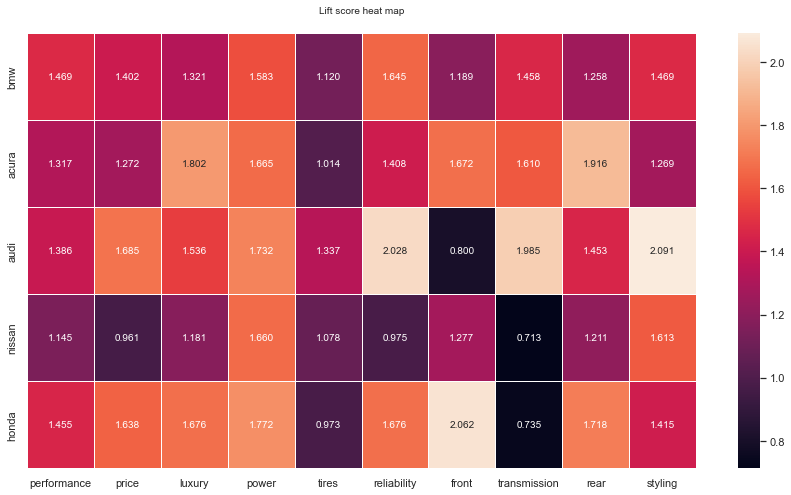

In [73]:
plt.figure(figsize=(15,8))
plt.title('Lift score heat map', fontsize = 10, pad = 20)
sns.heatmap(brand_feature_lift_1, linewidths=0.5, annot=True, fmt=".3f", annot_kws={"fontsize":10})

## Task G: 
### What advice will you give to your client from Task F?

## Task H:
### Which is the most aspirational brand in your data in terms of people actually wanting to buy  or own? Describe your analysis. What are the business implications for this brand?

In [74]:
Aspiration=pd.read_csv("aspiration.csv")
Aspiration['word'] = Aspiration['word'].str.lower()
Aspiration['aspr'] = Aspiration['aspr'].str.lower()
Aspiration

,word,aspr
0,wish,aspiration
1,wanted to,aspiration
2,want,aspiration
3,dream car,aspiration
4,dreamed,aspiration
5,dreaming,aspiration
6,dream of,aspiration
7,dream to,aspiration
8,couldn't afford,aspiration
9,best,aspiration


In [75]:
Aspiration_comment_df=pd.DataFrame(comments_df['Comment_tokenised'])

In [76]:
def aspiration_swap(entry):
    entry=' '.join(str(x) for x in entry)
    for i in Aspiration.index.values:
        entry = (entry.replace(str(Aspiration['word'][i]),str(Aspiration['aspr'][i])))
    return word_tokenize(entry)
Aspiration_comment_df['Comment_aspiration_tokenised']=Aspiration_comment_df['Comment_tokenised'].apply(aspiration_swap)

In [77]:
top5_brands=[key for key, item in brand_counts[:5]]
aspiration=list(Aspiration['aspr'].unique())
column=top5_brands+aspiration
brand_aspiration = pd.DataFrame(columns = column)

def aspiration_counter(item):
    if asp in item:
        return 1
    else:
        return 0
      
for  brand in top5_brands:
    brand_aspiration[brand] = Aspiration_comment_df['Comment_aspiration_tokenised'].apply(brand_counter)  

for asp in aspiration:
    brand_aspiration[asp]=Aspiration_comment_df['Comment_aspiration_tokenised'].apply(aspiration_counter) 

In [78]:
brand_aspiration_lift = pd.DataFrame(columns = aspiration, dtype=float)
length=len(brand_aspiration)
for i in range(len(top5_brands)):
    for j in range(len(aspiration)):
        
        Confidence=(brand_aspiration[((brand_aspiration[top5_brands[i]]==1) & (brand_aspiration[aspiration[j]]==1 ))][top5_brands[i]].count())
        Support_i=(brand_aspiration[((brand_aspiration[top5_brands[i]]==1))][top5_brands[i]].count())
        Support_j=(brand_aspiration[((brand_aspiration[aspiration[j]]==1))][aspiration[j]].count())
        Lift=(Confidence*length/(Support_i*Support_j))
        brand_aspiration_lift.loc[top5_brands[i],aspiration[j]]=float(Lift)

In [79]:
brand_aspiration_lift.sort_values(by = 'aspiration', ascending = False)

,aspiration
nissan,1.861813
audi,1.433855
bmw,1.329116
acura,1.319543
honda,1.271222


<AxesSubplot:title={'center':'Lift score heat map'}>

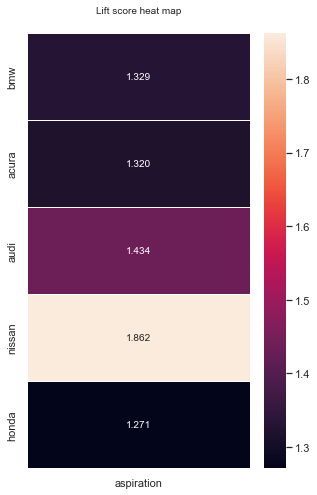

In [80]:
plt.figure(figsize=(5,8))
plt.title('Lift score heat map', fontsize = 10, pad = 20)
sns.heatmap(brand_aspiration_lift, linewidths=0.5, annot=True, fmt=".3f", annot_kws={"fontsize":10})

### Insights




# This is formatted as code


# Trying something not related to the existing thing. Write your code above this block

In [ ]:
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
#WebDriver is a browser automation framework that works with open source APIs. 
#The framework operates by accepting commands, sending those commands to a browser, and interacting with applications.
chrome_options = webdriver.ChromeOptions()
#headless means running chrome with chrome.exe
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

In [ ]:
page_url = "https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p434" 
driver = webdriver.Chrome('chromedriver',options=chrome_options)
driver.get(page_url)
driver.maximize_window()
driver.implicitly_wait(10)
comments_df_try = pd.DataFrame(columns = ['Date','Author','Comment','blockquote','comment_refined'])  
while len(comments_df_try)<=1:
  comments=driver.find_elements(By.CLASS_NAME, value="Comment")
  for comment in comments:
    author=comment.find_element(By.CLASS_NAME, value="Author").text
    date=comment.find_element(By.CLASS_NAME,value= "Meta.CommentMeta.CommentInfo").text 
    comment_body=comment.find_element(By.CLASS_NAME, value="Message.userContent").text
    try:
      blockquote=comment.find_element(By.CLASS_NAME, value="UserQuote.blockquote").text
    except:
      blockquote=''
    comment_refined=comment_body.replace(blockquote,'')
    comments_df_try.loc[len(comments_df_try.index)] = [ date, author,comment_body,blockquote,comment_refined ]
    

  next=driver.find_element(By.CLASS_NAME , value="Next")
  next.click()
  time.sleep(5)

#driver.close()

# Writing the scrapped data to a csv file
#comments_df.to_csv('Comments.csv', index=False) 

In [ ]:
comments_df

,Date,Author,Comment,blockquote,comment_refined
0,August 2019,andres3,benjaminh said:\nLuxury VW Arteon hatchback se...,benjaminh said:\nLuxury VW Arteon hatchback se...,\n\nThe leather is definitely more Audi-like t...
1,August 2019 edited August 2019,dino001,It just made my next car list. Looks very much...,,It just made my next car list. Looks very much...
2,August 2019,Michaell,dino001 said:\nIt just made my next car list. ...,dino001 said:\nIt just made my next car list. ...,\nThe 6/72 warranty is over with the 2019 mode...
3,August 2019,dino001,You mean 2019 is the last year? That’s a bumme...,,You mean 2019 is the last year? That’s a bumme...
4,August 2019,sda,dino001 said:\nYou mean 2019 is the last year?...,dino001 said:\nYou mean 2019 is the last year?...,"\n4 yr/50k, same as Audi. From what I read dea..."
5,August 2019 edited August 2019,dino001,So it's all about dealers and their profit mar...,,So it's all about dealers and their profit mar...
6,August 2019,circlew,Looks like lease is the best bet on WV/Audi. C...,,Looks like lease is the best bet on WV/Audi. C...
7,August 2019,andres3,circlew said:\nLooks like lease is the best be...,circlew said:\nLooks like lease is the best be...,\nI don't really see any cost cutting. However...
8,August 2019,stickguy,nice. So the Kia finally went back?\n\nI have ...,,nice. So the Kia finally went back?\n\nI have ...
9,August 2019,andres3,nd\nstickguy said:\nnice. So the Kia finally w...,stickguy said:\nnice. So the Kia finally went ...,nd\n\nIt is nice!\n\nDigital HD cluster gauges...
